In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt


In [2]:
time = 0
integral = 0
time_prev = -1e-6
e_prev = 0


In [3]:
#We will need to create a PID controllelr for each axis of the drone
#Pitch (Up and Down)
#Yaw (Left and right)
#Roll (Side to side (up down))

# Kp, Ki, Kd are weights for each of the 3 measures
# Setpoint is the desired value
# Measurement is the current value
# Output MV is an arbitrary value(scale to match rotations)
def PID(Kp, Ki, Kd, setpoint, measurement):
    global time, integral, time_prev, e_prev

    # Value of offset - when the error is equal zero
    offset = 320
    
    # PID calculations
    e = setpoint - measurement
        
    P = Kp*e
    integral = integral + Ki*e*(time - time_prev)
    D = Kd*(e - e_prev)/(time - time_prev)

    # calculate manipulated variable - MV 
    MV = offset + P + integral + D
    
    # update stored data for next iteration
    e_prev = e
    time_prev = time
    return MV

#Function for the system
def system(t, temp, Tq):
    epsilon = 1
    tau = 4
    Tf = 300
    Q = 2
    dTdt = 1/(tau*(1+epsilon)) * (Tf-temp) + Q/(1+epsilon)*(Tq-temp)
    return dTdt


Text(0, 0.5, 'Temperature')

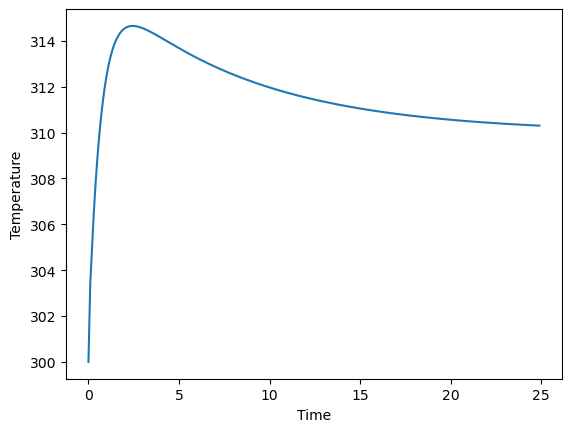

In [6]:

# number of steps
n = 250  


time_prev = 0
y0 = 300
deltat = 0.1
y_sol = [y0]
t_sol = [time_prev]  # Tq is chosen as a manipulated variable
Tq = 320  
q_sol = [Tq]
setpoint = 310
integral = 0
for i in range(1, n):
    time = i * deltat
    tspan = np.linspace(time_prev, time, 10)
    Tq = PID(0.6, 0.2, 0.1, setpoint, y_sol[-1]),
    yi = odeint(system,y_sol[-1], tspan, args = Tq, tfirst=True)
    t_sol.append(time)
    y_sol.append(yi[-1][0])
    q_sol.append(Tq[0])
    time_prev = time  

plt.plot(t_sol, y_sol)
plt.xlabel('Time')
plt.ylabel('Temperature')